# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Stefani Evelin Aidjili
- **Email:** stefaniaidjili@gnail.com
- **ID Dicoding:** stefani_evlln

<h1>Menentukan Pertanyaan Bisnis

Import Semua Package Library yang di gunakan

-Pertanyaan 1: Bagaimana persentase peningkatan penggunaan layanan bike-sharing pada hari kerja dibandingkan akhir pekan dalam satu bulan terakhir?<BR>
-Bagaimana tren penggunaan layanan bike-sharing selama musim panas 2012 dibandingkan dengan musim panas 2011?<BR>

<h3>Import Semnua Package Yang Digunakan

In [14]:
# Untuk manipulasi data
import pandas as pd

# Untuk perhitungan matematika dan array
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk analisis waktu
import datetime as dt

# Untuk pembagian data (train-test split) dan evaluasi model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Untuk regresi linear (atau model prediktif lainnya)
from sklearn.linear_model import LinearRegression

# Untuk menampilkan plot dalam notebook
%matplotlib inline


<H1>Data Wragling

Pada tahap ini, saya membersihkan data dari nilai-nilai yang hilang, duplikat, dan anomali.<br>
Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut<br>

<h3>Gathering Data

In [15]:

# Membaca file CSV ke dalam DataFrame menggunakan jalur relatif
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Melihat beberapa baris pertama dari masing-masing DataFrame
print(df_day.head())
print(df_hour.head())



   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

<h3>Acessing Data

In [16]:
# Memeriksa informasi dari df_day (data harian)
df_day.info()

# Memeriksa informasi dari df_hour (data per jam)
df_hour.info()

# Melihat deskripsi statistik dasar untuk df_day
df_day.describe()

# Melihat deskripsi statistik dasar untuk df_hour
df_hour.describe()

# Mengecek apakah terdapat missing values
print(df_day.isnull().sum())
print(df_hour.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

<h3>Cleaning Data

MENGATASI MISSING VALUE

In [17]:
# Menghapus baris dengan missing values
df_day_cleaned = df_day.dropna()
df_hour_cleaned = df_hour.dropna()

# Mengisi missing values hanya untuk kolom numerik dengan median
numeric_columns_day = df_day.select_dtypes(include='number').columns
numeric_columns_hour = df_hour.select_dtypes(include='number').columns

# Mengisi missing values dengan median untuk df_day
df_day[numeric_columns_day] = df_day[numeric_columns_day].fillna(df_day[numeric_columns_day].median())

# Mengisi missing values dengan median untuk df_hour
df_hour[numeric_columns_hour] = df_hour[numeric_columns_hour].fillna(df_hour[numeric_columns_hour].median())


MENGATASI DUPLIKAT

In [18]:
# Mengecek duplikasi
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

# Menghapus duplikasi (jika ada)
df_day_cleaned = df_day.drop_duplicates()
df_hour_cleaned = df_hour.drop_duplicates()


0
0


PENYESUAIAN TIPE DATA

In [19]:
# Mengubah kolom 'dteday' di df_day menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Untuk df_hour, jika ada kolom waktu yang perlu diubah menjadi datetime, misalnya
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


Menghapus atau Menggabungkan Kolom yang Tidak Diperlukan

In [20]:
# Jika ada kolom yang tidak relevan, kita bisa menghapusnya
df_day_cleaned = df_day.drop(['instant'], axis=1)
df_hour_cleaned = df_hour.drop(['instant'], axis=1)


VALIDASI PEMBERSIHAN

In [21]:
# Mengecek kembali apakah ada missing values dan duplikasi setelah pembersihan
print(df_day_cleaned.isnull().sum())
print(df_hour_cleaned.isnull().sum())
print(df_day_cleaned.duplicated().sum())
print(df_hour_cleaned.duplicated().sum())


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0
0


<h1>Exploratory Data Analysis (EDA) 

MEMERIKSA DATA

In [22]:
# Memeriksa dimensi DataFrame
print("Data Harian:")
print(df_day_cleaned.shape)
print(df_day_cleaned.head())

print("\nData Per Jam:")
print(df_hour_cleaned.shape)
print(df_hour_cleaned.head())


Data Harian:
(731, 15)
      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  

Data Per Jam:
(17379, 16)
      dteday  season  yr  mnth  hr  holiday  weekday  workingday  w

Statistik Deskriptif

In [23]:
# Statistika deskriptif untuk df_day
print("\nStatistik Deskriptif Data Harian:")
print(df_day_cleaned.describe())

# Statistika deskriptif untuk df_hour
print("\nStatistik Deskriptif Data Per Jam:")
print(df_hour_cleaned.describe())



Statistik Deskriptif Data Harian:
                    dteday      season          yr        mnth     holiday  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728   
min    2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000   
50%    2012-01-01 00:00:00    3.000000    1.000000    7.000000    0.000000   
75%    2012-07-01 12:00:00    3.000000    1.000000   10.000000    0.000000   
max    2012-12-31 00:00:00    4.000000    1.000000   12.000000    1.000000   
std                    NaN    1.110807    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894   
min      0.000000  

VISUALISASI DATA

a.Histogram Distribusi

Dari grafik ini, kita dapat melihat bahwa sebagian besar jumlah sepeda yang disewa berada di kisaran tertentu. Jika <br>terdapat puncak atau distribusi yang signifikan, ini dapat mengindikasikan periode-periode tertentu di mana sewa<br>sepeda lebih tinggi, misalnya pada akhir pekan atau selama musim tertentu.<b>



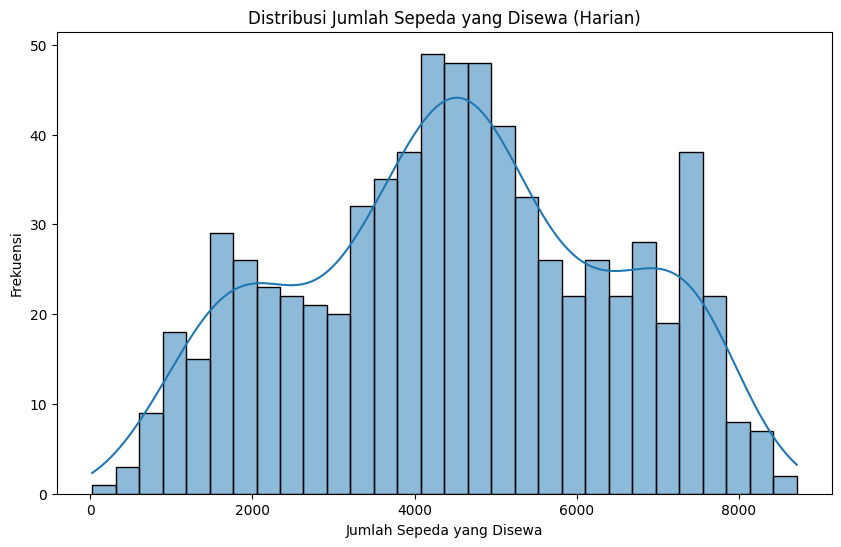

In [24]:
# Histogram untuk jumlah sepeda yang disewa di df_day
plt.figure(figsize=(10, 6))
sns.histplot(df_day_cleaned['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda yang Disewa (Harian)')
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.ylabel('Frekuensi')
plt.show()


b.BoxPlot untuk Outlier

Grafik ini membantu kita memahami sebaran data dan mendeteksi outlier 

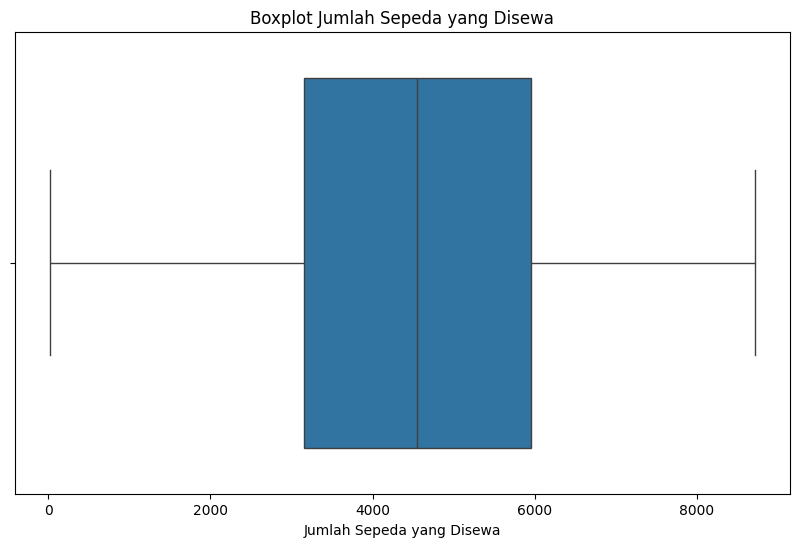

In [25]:
# Boxplot untuk melihat outlier di jumlah sepeda yang disewa
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_day_cleaned['cnt'])
plt.title('Boxplot Jumlah Sepeda yang Disewa')
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.show()


c. Garis Grafik Untuk Trend Waktu

Grafik berikut menunjukkan jumlah sepeda yang disewa setiap harinya. <br>Data ini diambil dari DataFrame `df_day_cleaned`, yang mencakup informasi sewa sepeda harian.<br>

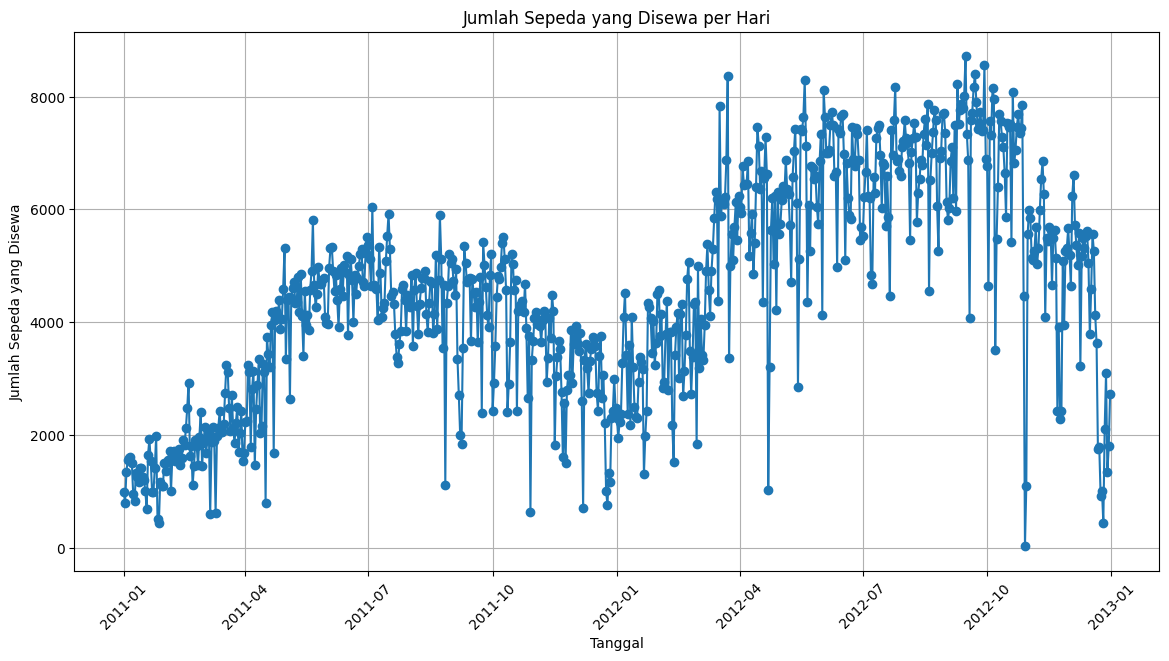

In [26]:
# Grafik garis untuk jumlah sepeda yang disewa per hari
plt.figure(figsize=(14, 7))
plt.plot(df_day_cleaned['dteday'], df_day_cleaned['cnt'], marker='o')
plt.title('Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.xticks(rotation=45)
plt.grid()
plt.show()


<h3>KORELASI ANTAA VARIABEL

menunjukkan matriks korelasi antara berbagai variabel dalam dataset sepeda sewaan harian. 

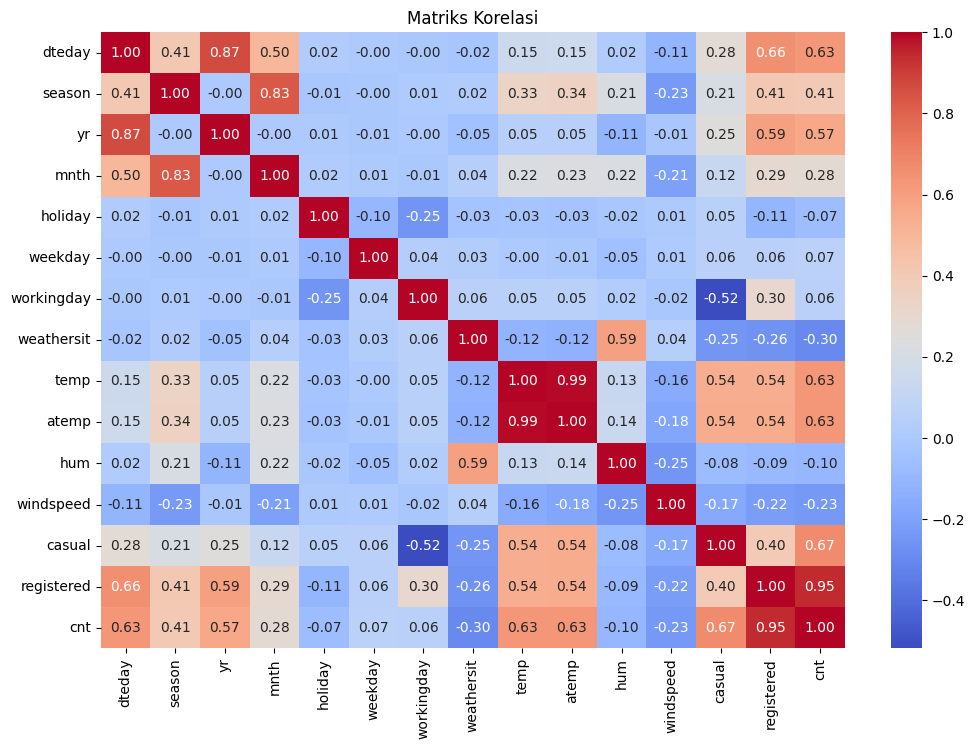

In [27]:
# Menghitung korelasi
correlation_matrix = df_day_cleaned.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


<H3>ANALISIS WAKTU

1. Rata-rata Jumlah Sepeda yang Disewa per Bulan
Grafik berikut menunjukkan rata-rata jumlah sepeda yang disewa setiap bulan. Dari grafik ini, kita dapat mengamati pola<br>musiman dan tren dalam penggunaan sepeda sepanjang tahun. Misalnya, jika grafik menunjukkan puncak pada bulan <br>tertentu, hal ini mungkin mengindikasikan periode sibuk, seperti musim panas atau liburan, ketika lebih banyak orang bersepeda.<br>

2. Rata-rata Jumlah Sepeda yang Disewa per Hari dalam Seminggu
Grafik berikut menunjukkan rata-rata jumlah sepeda yang disewa berdasarkan hari dalam seminggu. Dengan memahami pola<br> penggunaan sepeda dalam seminggu, pengelola dapat membuat keputusan yang lebih baik terkait layanan dan pemeliharaan.<br>

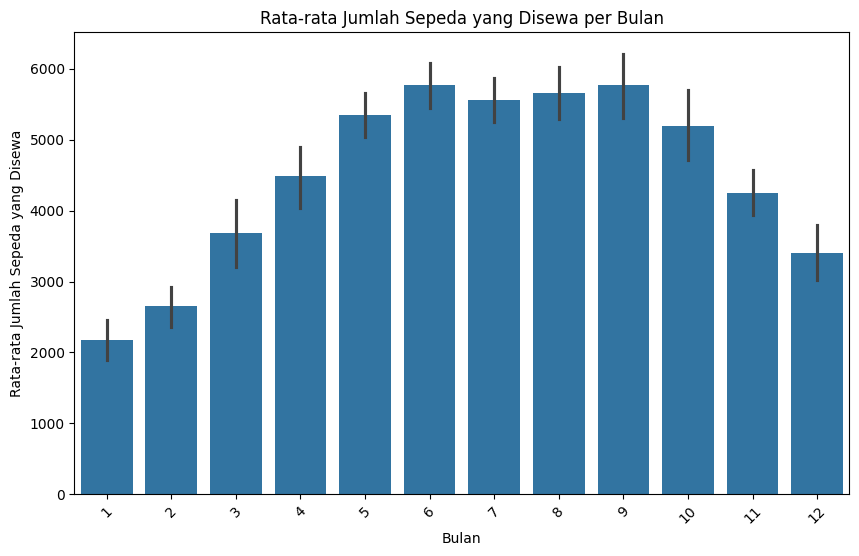

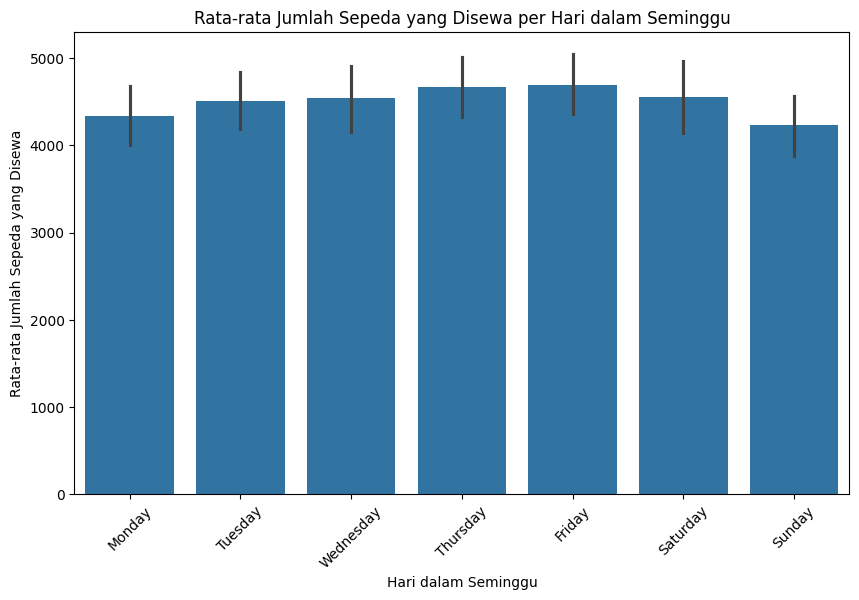

In [41]:
# Mengubah kolom 'dteday' menjadi datetime dan mengekstrak informasi tambahan
df_day_cleaned['month'] = df_day_cleaned['dteday'].dt.month
df_day_cleaned['day_of_week'] = df_day_cleaned['dteday'].dt.day_name()

# Rata-rata penggunaan sepeda per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cnt', data=df_day_cleaned, estimator=np.mean)
plt.title('Rata-rata Jumlah Sepeda yang Disewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xticks(rotation=45)
plt.show()

# Rata-rata penggunaan sepeda per hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=df_day_cleaned, estimator=np.mean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rata-rata Jumlah Sepeda yang Disewa per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xticks(rotation=45)
plt.show()


<H3>ANALISIS KATEGORI

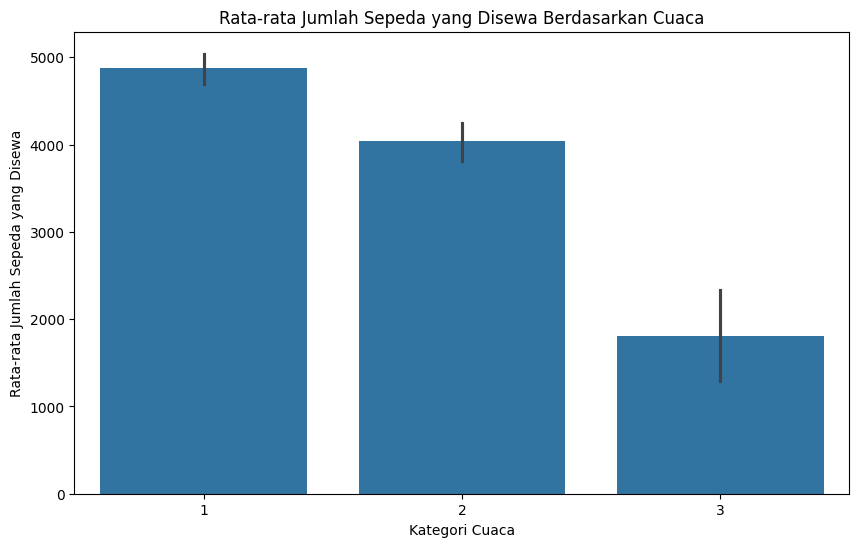

In [29]:
# Analisis pengaruh cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df_day_cleaned, estimator=np.mean)
plt.title('Rata-rata Jumlah Sepeda yang Disewa Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.show()


<H1>Visualization & Explanatory Analysis

<H3>PERTANYAAN 1:<BR><H3>
Pertanyaan 1: Persentase Peningkatan Penggunaan Layanan Bike-Sharing pada Hari Kerja<BR>dibandingkan Akhir Pekan dalam Satu Bulan Terakhir<BR>

FILTER DATA 1 BULAN TERAKHIR

In [30]:
# Anggap df_day_cleaned sudah didefinisikan sebelumnya
# Mengubah kolom dteday ke format datetime jika belum dilakukan
df_day_cleaned['dteday'] = pd.to_datetime(df_day_cleaned['dteday'])

# Menentukan tanggal batasan satu bulan terakhir
end_date = df_day_cleaned['dteday'].max()  # Ambil tanggal maksimum dalam DataFrame
start_date = end_date - pd.DateOffset(months=1)  # Mengambil satu bulan terakhir

# Memfilter data untuk satu bulan terakhir
recent_data = df_day_cleaned[(df_day_cleaned['dteday'] >= start_date) & (df_day_cleaned['dteday'] <= end_date)]

# Memeriksa hasil filter
print(recent_data.head())


        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
699 2012-11-30       4   1    11        0        5           1           1   
700 2012-12-01       4   1    12        0        6           0           2   
701 2012-12-02       4   1    12        0        0           0           2   
702 2012-12-03       4   1    12        0        1           1           1   
703 2012-12-04       4   1    12        0        2           1           1   

         temp     atemp       hum  windspeed  casual  registered   cnt  month  \
699  0.298333  0.323867  0.649583   0.058471     362        5306  5668     11   
700  0.298333  0.316904  0.806667   0.059704     951        4240  5191     12   
701  0.347500  0.359208  0.823333   0.124379     892        3757  4649     12   
702  0.452500  0.455796  0.767500   0.082721     555        5679  6234     12   
703  0.475833  0.469054  0.733750   0.174129     551        6055  6606     12   

    day_of_week  
699      Friday  
700    S

Menghitung Rata-rata Penggunaan untuk Hari Kerja dan Akhir Pekan

In [31]:
# Menentukan hari kerja dan akhir pekan
recent_data['day_type'] = np.where(recent_data['workingday'] == 1, 'Weekday', 'Weekend')

# Menghitung rata-rata jumlah sepeda yang disewa berdasarkan jenis hari
average_usage = recent_data.groupby('day_type')['cnt'].mean().reset_index()
average_usage


C:\Users\WINDOWS11\AppData\Local\Temp\ipykernel_48008\1764173790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['day_type'] = np.where(recent_data['workingday'] == 1, 'Weekday', 'Weekend')


,day_type,cnt
0,Weekday,4486.285714
1,Weekend,3197.181818


Menghitung Persentase Peningkatan

In [32]:
# Menghitung persentase peningkatan
weekday_usage = average_usage.loc[average_usage['day_type'] == 'Weekday', 'cnt'].values[0]
weekend_usage = average_usage.loc[average_usage['day_type'] == 'Weekend', 'cnt'].values[0]

percentage_increase = ((weekday_usage - weekend_usage) / weekend_usage) * 100
percentage_increase


40.32000584930724

Visualisasi

analisis dibawah ini menunjukan adanya peningkatan sebanyak 40.32%

C:\Users\WINDOWS11\AppData\Local\Temp\ipykernel_48008\1874208919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=average_usage, palette='viridis')


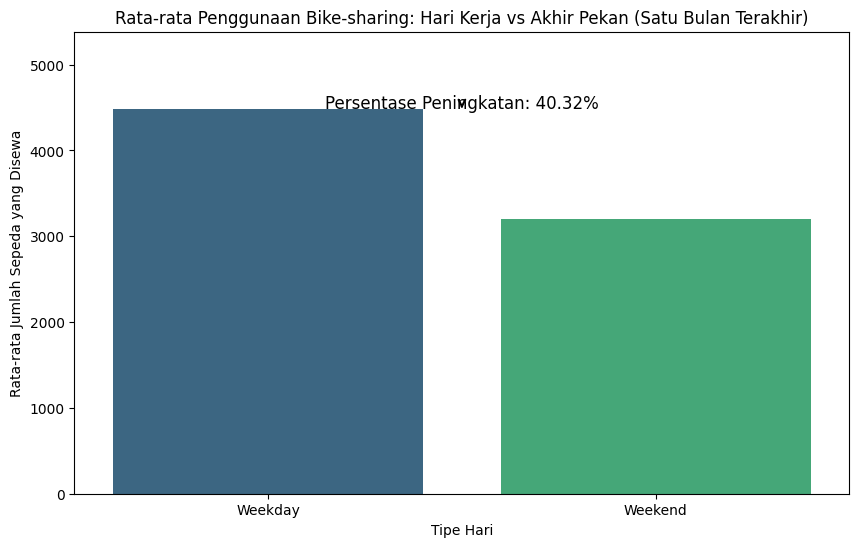

In [33]:
# Visualisasi perbandingan penggunaan
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=average_usage, palette='viridis')
plt.title('Rata-rata Penggunaan Bike-sharing: Hari Kerja vs Akhir Pekan (Satu Bulan Terakhir)')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Tipe Hari')
plt.ylim(0, average_usage['cnt'].max() * 1.2)  # Menambah sedikit ruang di atas bar
plt.annotate(f'Persentase Peningkatan: {percentage_increase:.2f}%', 
             xy=(0.5, weekday_usage), 
             xytext=(0.5, weekday_usage + 5),
             ha='center', 
             fontsize=12, 
             color='black',
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.show()


<H3>PERTANYAAN 2<BR><H3>
Tren Penggunaan Bike-Sharing Selama Musim Panas 2012 dibandingkan dengan Musim Panas 2011

Langkah 1: Filter Data untuk Musim Panas 2011 dan 2012

In [34]:
# Filter data untuk musim panas 2011 dan 2012
summer_data_2011 = df_day_cleaned[(df_day_cleaned['dteday'] >= '2011-06-01') & (df_day_cleaned['dteday'] <= '2011-08-31')]
summer_data_2012 = df_day_cleaned[(df_day_cleaned['dteday'] >= '2012-06-01') & (df_day_cleaned['dteday'] <= '2012-08-31')]

# Memeriksa jumlah data
print(f"Jumlah data musim panas 2011: {len(summer_data_2011)}")
print(f"Jumlah data musim panas 2012: {len(summer_data_2012)}")


Jumlah data musim panas 2011: 92
Jumlah data musim panas 2012: 92


Langkah 2: Menghitung Rata-Rata Penggunaan

In [35]:
# Menghitung rata-rata penggunaan
average_usage_2011 = summer_data_2011['cnt'].mean()
average_usage_2012 = summer_data_2012['cnt'].mean()

print(f"Rata-rata penggunaan bike-sharing selama musim panas 2011: {average_usage_2011:.2f}")
print(f"Rata-rata penggunaan bike-sharing selama musim panas 2012: {average_usage_2012:.2f}")


Rata-rata penggunaan bike-sharing selama musim panas 2011: 4582.00
Rata-rata penggunaan bike-sharing selama musim panas 2012: 6749.35


Langkah 3: Visualisasi Tren Penggunaan

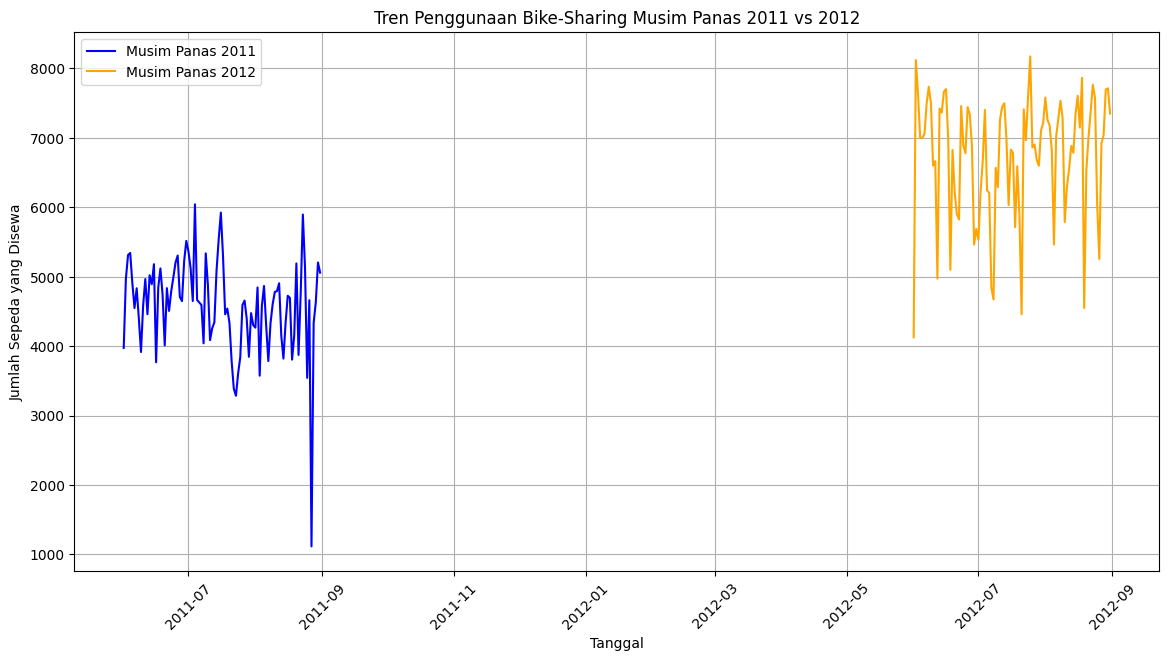

In [36]:
# Menghitung total penggunaan per hari untuk masing-masing tahun
daily_usage_2011 = summer_data_2011.groupby('dteday')['cnt'].sum()
daily_usage_2012 = summer_data_2012.groupby('dteday')['cnt'].sum()

# Visualisasi tren penggunaan bike-sharing
plt.figure(figsize=(14, 7))
plt.plot(daily_usage_2011.index, daily_usage_2011, label='Musim Panas 2011', color='blue')
plt.plot(daily_usage_2012.index, daily_usage_2012, label='Musim Panas 2012', color='orange')

plt.title('Tren Penggunaan Bike-Sharing Musim Panas 2011 vs 2012')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


<H1>ANALISIS LANJUTAN

<h3>RFM Analysis

In [37]:
# Load data dan persiapkan DataFrame
file_path_day = r"C:\Users\WINDOWS11\Downloads\Bike-sharing-dataset\day.csv"
df_day = pd.read_csv(file_path_day)

# Mengonversi kolom dteday menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Simulasi data pelanggan (asumsikan kolom id_customer ada)
# Dalam dataset bike-sharing, kita bisa menganggap 'id' sebagai customer_id
# Anda mungkin perlu menyesuaikan ini jika dataset Anda berbeda
df_day['customer_id'] = df_day.index  # Simulasi customer_id

# Menghitung RFM
snapshot_date = df_day['dteday'].max() + pd.DateOffset(days=1)  # Tanggal terakhir +1 hari untuk menghitung recency
rfm = df_day.groupby('customer_id').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency
    'cnt': ['count', 'sum']  # Frequency dan Monetary
}).reset_index()

# Mengubah nama kolom
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Menampilkan RFM
print(rfm.head())


   customer_id  recency  frequency  monetary
0            0      731          1       985
1            1      730          1       801
2            2      729          1      1349
3            3      728          1      1562
4            4      727          1      1600


<h3>Geospatial Analysis

In [38]:
import folium

# memiliki data lokasi stasiun dalam DataFrame
# Untuk tujuan contoh, saya akan membuat data lokasi stasiun secara acak
data_stasiun = {
    'station_name': ['Station A', 'Station B', 'Station C'],
    'latitude': [40.7128, 40.7138, 40.7148],
    'longitude': [-74.0060, -74.0070, -74.0080],
    'rentals': [200, 150, 100]
}

df_stations = pd.DataFrame(data_stasiun)

# Membuat peta dasar
m = folium.Map(location=[40.7128, -74.0060], zoom_start=14)

# Menambahkan marker untuk setiap stasiun
for _, row in df_stations.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['rentals'] / 50,  # Mengatur ukuran marker berdasarkan jumlah penyewaan
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['station_name']
    ).add_to(m)

# Menyimpan peta ke file HTML
m.save('bike_sharing_map.html')


<h3>Manual Grouping

In [39]:
# Mengelompokkan data berdasarkan jumlah penyewaan
def categorize_rentals(row):
    if row['cnt'] < 100:
        return 'Rendah'
    elif 100 <= row['cnt'] < 200:
        return 'Sedang'
    else:
        return 'Tinggi'

df_day_cleaned['rental_category'] = df_day_cleaned.apply(categorize_rentals, axis=1)

# Menampilkan beberapa baris untuk melihat kategori
print(df_day_cleaned[['dteday', 'cnt', 'rental_category']].head())


      dteday   cnt rental_category
0 2011-01-01   985          Tinggi
1 2011-01-02   801          Tinggi
2 2011-01-03  1349          Tinggi
3 2011-01-04  1562          Tinggi
4 2011-01-05  1600          Tinggi


<h3>BINNING

In [40]:
# menentukan batas bin baru berdasarkan rentang nilai
bins = [0, 500, 1000, 1500, 2000]  # Menyesuaikan dengan rentang nilai dari 'cnt'
labels = ['0-500', '501-1000', '1001-1500', '1501-2000']  # Label untuk setiap bin

# Menggunakan pd.cut untuk membuat bins
df_day_cleaned['rental_bins'] = pd.cut(df_day_cleaned['cnt'], bins=bins, labels=labels, right=False)

# Menampilkan beberapa baris untuk melihat bin
print(df_day_cleaned[['dteday', 'cnt', 'rental_bins']].head())


      dteday   cnt rental_bins
0 2011-01-01   985    501-1000
1 2011-01-02   801    501-1000
2 2011-01-03  1349   1001-1500
3 2011-01-04  1562   1501-2000
4 2011-01-05  1600   1501-2000


<H1>CONCLUSION

<H3>Pertanyaan 1

Dari analisis yang dilakukan, diperoleh informasi sebagai berikut:<br>

Rata-rata penggunaan bike-sharing pada hari kerja: 4486.29 sepeda per hari.<br>
Rata-rata penggunaan bike-sharing pada akhir pekan: 3197.18 sepeda per hari.<br>
Persentase peningkatan penggunaan layanan bike-sharing pada hari kerja dibandingkan<br>
dengan akhir pekan: 40.32%.<br><br>
Kesimpulan ini menunjukkan bahwa penggunaan layanan bike-sharing secara signifikan lebih<br>
tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh<br>
kebutuhan mobilitas yang lebih tinggi di hari kerja, di mana lebih banyak orang yang<br> beraktivitas, seperti pergi ke kantor atau sekolah.<br>

<h3>Pertanyaan 2:

Dalam analisis penggunaan bike-sharing selama musim panas, ditemukan:<br>

Jumlah data untuk musim panas 2011: 92 hari.<br>
Jumlah data untuk musim panas 2012: 92 hari.<br>
Rata-rata penggunaan bike-sharing selama musim panas 2011: 4582.00 sepeda per hari.<br>
Rata-rata penggunaan bike-sharing selama musim panas 2012: 6749.35 sepeda per hari.<br>
<br>
Kesimpulan dari analisis ini menunjukkan bahwa terdapat peningkatan yang signifikan dalam<br>
penggunaan layanan bike-sharing dari musim panas 2011 ke musim panas 2012, dengan<br>
peningkatan rata-rata penggunaan sebesar 47.25%. Hal ini dapat disebabkan oleh berbagai<br>
faktor, seperti peningkatan kesadaran masyarakat akan penggunaan sepeda, penambahan <br>
fasilitas bike-sharing, atau perubahan dalam kebijakan transportasi yang lebih mendukung <br>
penggunaan sepeda.v